<a href="https://colab.research.google.com/github/mvdheram/Social-bias-Detection/blob/main/Baselines_anti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification using NBSVM

Paper: https://nlp.stanford.edu/pubs/sidaw12_simple_sentiment.pdf

Tutorial : https://github.com/amaiya/ktrain/blob/master/tutorials/tutorial-04-text-classification.ipynb

A varient of Support Vector Machines (SVM) using Naive Bayes (NB) log-count ratios as feature values. 

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID";
os.environ["CUDA_VISIBLE_DEVICES"] = "0";

In [ ]:
pip install ktrain 

In [ ]:
import ktrain
from ktrain import text
import pandas as pd

In [ ]:
dataset = pd.read_csv('/content/combined_stereo_antiStereo.csv', index_col=0)

In [ ]:
len(dataset)

9966

In [ ]:
dataset.head()

,sentences,stereo_antistereo
0,His mind wondered if a doctor was behind this ...,anti-stereotype
1,The woman was highly skilled in CAD engineerin...,anti-stereotype
2,Hispanics are good at reading,anti-stereotype
3,He felt threatened by the presence of the tiny...,anti-stereotype
4,The construction worker's wheelchair got stuck...,anti-stereotype


In [ ]:
dataset.stereo_antistereo.value_counts()

stereotype         5519
anti-stereotype    4447
Name: stereo_antistereo, dtype: int64

In [ ]:
X = dataset.iloc[:,0].values
y = dataset.iloc[:,1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [ ]:
categories = dataset.stereo_antistereo.unique()
print(categories)

['anti-stereotype' 'stereotype']


In [ ]:
# load training and validation data from a folder
DATADIR = '/content/combined_stereo_antiStereo.csv'
trn, val, preproc = text.texts_from_csv(DATADIR,
                                         text_column = 'sentences',
                                         label_columns = 'stereo_antistereo',
                                           max_features=80000, maxlen=2000, 
                                           ngram_range=1, 
                                           preprocess_mode='standard',
                                          )

detected encoding: utf-8 (if wrong, set manually)
language: en
Word Counts: 8036
Nrows: 8969
8969 train sequences
train sequence lengths:
	mean : 12
	95percentile : 23
	99percentile : 31
x_train shape: (8969,2000)
y_train shape: (8969, 2)
Is Multi-Label? False
997 test sequences
test sequence lengths:
	mean : 12
	95percentile : 22
	99percentile : 28
x_test shape: (997,2000)
y_test shape: (997, 2)


In [ ]:
# Load NBSVM model
model = text.text_classifier('nbsvm',trn, preproc=preproc)

Is Multi-Label? False
compiling word ID features...
maxlen is 2000
building document-term matrix... this may take a few moments...
rows: 1-8969
computing log-count ratios...
done.


In [ ]:
learner = ktrain.get_learner(model, train_data=trn, val_data=val)

In [ ]:
learner.lr_find()

simulating training for different learning rates... this may take a few moments...
Epoch 1/1024
281/281 [==============================] - 2s 6ms/step - loss: 0.3951 - accuracy: 0.8427
Epoch 2/1024
281/281 [==============================] - 2s 6ms/step - loss: 0.3951 - accuracy: 0.8427
Epoch 3/1024
281/281 [==============================] - 2s 7ms/step - loss: 0.3952 - accuracy: 0.8425
Epoch 4/1024
281/281 [==============================] - 2s 7ms/step - loss: 0.3968 - accuracy: 0.8410
Epoch 5/1024
281/281 [==============================] - 2s 7ms/step - loss: 0.4390 - accuracy: 0.8006
Epoch 6/1024
281/281 [==============================] - 2s 6ms/step - loss: 2.1520 - accuracy: 0.6783


done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


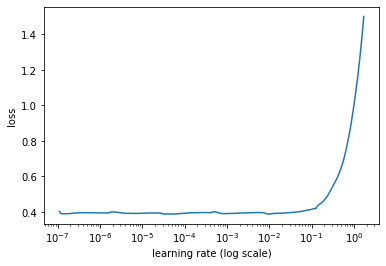

In [ ]:
learner.lr_plot()

SGD with restart (SGDR)

Article : https://medium.com/38th-street-studios/exploring-stochastic-gradient-descent-with-restarts-sgdr-fa206c38a74e

Goal: Avoid local minima

"Annealing" for learning rate: How small or large step to take in the gradient descent

Idea: "  let’s reset our learning rate every so many iterations so that we may be able to more easily pop out of a local minimum if we appear stuck."

Start with the given learning rate while gradurally decreasing (annealing) for cycle_len and again jump back to the initial learning rate. 

cycle_mult: Multiply lenght of cycle by something. 

**Below example** :

3 cycles

annealing decrease rate : per cycle (1 epoch) multiplied by 2 per epoch = > 1,2,4 

total=> (1+2+4) 7 epochs 





In [ ]:
learner.fit(1e-2, 3, cycle_len=1, cycle_mult=2)

Epoch 1/7
281/281 [==============================] - 2s 7ms/step - loss: 0.4058 - accuracy: 0.8323 - val_loss: 0.7484 - val_accuracy: 0.5767
Epoch 2/7
281/281 [==============================] - 2s 7ms/step - loss: 0.3967 - accuracy: 0.8343 - val_loss: 0.7807 - val_accuracy: 0.5878
Epoch 3/7
281/281 [==============================] - 2s 7ms/step - loss: 0.3682 - accuracy: 0.8528 - val_loss: 0.7879 - val_accuracy: 0.5868
Epoch 4/7
281/281 [==============================] - 2s 7ms/step - loss: 0.3765 - accuracy: 0.8418 - val_loss: 0.8249 - val_accuracy: 0.5747
Epoch 5/7
281/281 [==============================] - 2s 7ms/step - loss: 0.3554 - accuracy: 0.8552 - val_loss: 0.8485 - val_accuracy: 0.5777
Epoch 6/7
281/281 [==============================] - 2s 7ms/step - loss: 0.3399 - accuracy: 0.8626 - val_loss: 0.8585 - val_accuracy: 0.5747
Epoch 7/7
281/281 [==============================] - 2s 7ms/step - loss: 0.3312 - accuracy: 0.8684 - val_loss: 0.8599 - val_accuracy: 0.5747


# Classification using Logistic regression with trainable embedding layer 

In [ ]:
model2 = text.text_classifier('logreg',trn,preproc=preproc)

Is Multi-Label? False
compiling word ID features...
maxlen is 2000
done.


In [ ]:
learner = ktrain.get_learner(model2, train_data=trn, val_data=val)

simulating training for different learning rates... this may take a few moments...
Epoch 1/1024
281/281 [==============================] - 3s 8ms/step - loss: 0.6938 - accuracy: 0.4863
Epoch 2/1024
281/281 [==============================] - 2s 8ms/step - loss: 0.6936 - accuracy: 0.4909
Epoch 3/1024
281/281 [==============================] - 2s 8ms/step - loss: 0.6905 - accuracy: 0.5462
Epoch 4/1024
281/281 [==============================] - 2s 8ms/step - loss: 0.6728 - accuracy: 0.5975
Epoch 5/1024
281/281 [==============================] - 2s 8ms/step - loss: 0.7571 - accuracy: 0.6287
Epoch 6/1024
281/281 [==============================] - 2s 6ms/step - loss: 3.4379 - accuracy: 0.6075


done.
Visually inspect loss plot and select learning rate associated with falling loss


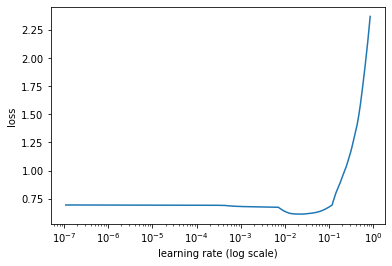

In [ ]:
learner.lr_find(show_plot=True)

In [ ]:
learner.autofit(1e-2)

early_stopping automatically enabled at patience=5
reduce_on_plateau automatically enabled at patience=2


begin training using triangular learning rate policy with max lr of 0.01...
Epoch 1/1024
281/281 [==============================] - 3s 10ms/step - loss: 0.6729 - accuracy: 0.5734 - val_loss: 0.6472 - val_accuracy: 0.6108
Epoch 2/1024
281/281 [==============================] - 3s 10ms/step - loss: 0.5755 - accuracy: 0.7040 - val_loss: 0.6673 - val_accuracy: 0.5878
Epoch 3/1024
281/281 [==============================] - 3s 10ms/step - loss: 0.5180 - accuracy: 0.7575 - val_loss: 0.6836 - val_accuracy: 0.5757

Epoch 00003: Reducing Max LR on Plateau: new max lr will be 0.005 (if not early_stopping).
Epoch 4/1024
281/281 [==============================] - 3s 10ms/step - loss: 0.4646 - accuracy: 0.8014 - val_loss: 0.6960 - val_accuracy: 0.5767
Epoch 5/1024
281/281 [==============================] - 3s 9ms/step - loss: 0.4465 - accuracy: 0.8129 - val_loss: 0.7057 - val_accuracy: 0.5687



# Classification using fastext-model

In [ ]:
model3 = text.text_classifier('fasttext',trn, preproc = preproc)
learner = ktrain.get_learner(model3, train_data=trn, val_data=val)

Is Multi-Label? False
compiling word ID features...
maxlen is 2000
done.


simulating training for different learning rates... this may take a few moments...
Epoch 1/1024
281/281 [==============================] - 20s 68ms/step - loss: 0.9367 - accuracy: 0.4837
Epoch 2/1024
281/281 [==============================] - 19s 66ms/step - loss: 0.8819 - accuracy: 0.5080
Epoch 3/1024
281/281 [==============================] - 19s 66ms/step - loss: 0.8862 - accuracy: 0.4928
Epoch 4/1024
281/281 [==============================] - 18s 66ms/step - loss: 0.7744 - accuracy: 0.5321
Epoch 5/1024
281/281 [==============================] - 19s 66ms/step - loss: 0.7021 - accuracy: 0.5592
Epoch 6/1024
281/281 [==============================] - 14s 50ms/step - loss: 3.5271 - accuracy: 0.5268


done.
Visually inspect loss plot and select learning rate associated with falling loss


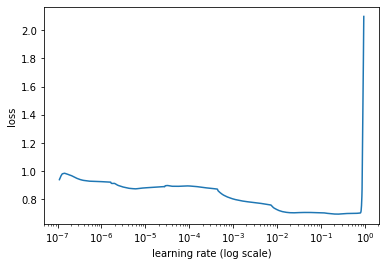

In [ ]:
learner.lr_find(show_plot=True)

In [ ]:
learner.autofit(5e-3)

early_stopping automatically enabled at patience=5
reduce_on_plateau automatically enabled at patience=2


begin training using triangular learning rate policy with max lr of 0.005...
Epoch 1/1024
281/281 [==============================] - 2s 8ms/step - loss: 0.5314 - accuracy: 0.7715 - val_loss: 0.6362 - val_accuracy: 0.6078
Epoch 2/1024
281/281 [==============================] - 2s 8ms/step - loss: 0.5026 - accuracy: 0.7877 - val_loss: 0.6475 - val_accuracy: 0.6048
Epoch 3/1024
281/281 [==============================] - 2s 8ms/step - loss: 0.4817 - accuracy: 0.7989 - val_loss: 0.6583 - val_accuracy: 0.5998

Epoch 00003: Reducing Max LR on Plateau: new max lr will be 0.0025 (if not early_stopping).
Epoch 4/1024
281/281 [==============================] - 2s 8ms/step - loss: 0.4640 - accuracy: 0.8107 - val_loss: 0.6639 - val_accuracy: 0.5968
Epoch 5/1024
281/281 [==============================] - 2s 8ms/step - loss: 0.4563 - accuracy: 0.8145 - val_loss: 0.6702 - val_accuracy: 0.5988

Ep

# Classification using Bidirectional GRU with pretrained fasttext word vectors

In [ ]:
model4 = text.text_classifier('bigru',trn,preproc)

Is Multi-Label? False
compiling word ID features...
maxlen is 2000
word vectors will be loaded from: https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.en.300.vec.gz
processing pretrained word vectors...
loading pretrained word vectors...this may take a few moments...


done.


In [ ]:
learner = ktrain.get_learner(model4, train_data=trn, val_data=val)

simulating training for different learning rates... this may take a few moments...
Epoch 1/1024
281/281 [==============================] - 124s 414ms/step - loss: 0.6950 - accuracy: 0.4913
Epoch 2/1024
281/281 [==============================] - 116s 412ms/step - loss: 0.6940 - accuracy: 0.5015
Epoch 3/1024
281/281 [==============================] - 116s 413ms/step - loss: 0.6882 - accuracy: 0.5487
Epoch 4/1024
281/281 [==============================] - 116s 413ms/step - loss: 0.6643 - accuracy: 0.5858
Epoch 5/1024
281/281 [==============================] - 116s 413ms/step - loss: nan - accuracy: 0.6239
Epoch 6/1024
281/281 [==============================] - 116s 412ms/step - loss: nan - accuracy: 0.4483
Epoch 7/1024
281/281 [==============================] - 68s 242ms/step - loss: nan - accuracy: 0.4467


done.
Visually inspect loss plot and select learning rate associated with falling loss


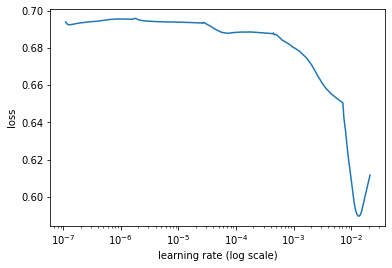

In [ ]:
learner.lr_find(show_plot=True)

In [ ]:
learner.fit(1e-3,3, cycle_len=1, cycle_mult=2)

Epoch 1/7
281/281 [==============================] - 124s 428ms/step - loss: 0.6699 - accuracy: 0.5752 - val_loss: 0.6489 - val_accuracy: 0.6239
Epoch 2/7
281/281 [==============================] - 119s 424ms/step - loss: 0.6020 - accuracy: 0.6661 - val_loss: 0.6036 - val_accuracy: 0.6690
Epoch 3/7
281/281 [==============================] - 119s 424ms/step - loss: 0.4652 - accuracy: 0.7920 - val_loss: 0.6578 - val_accuracy: 0.6610
Epoch 4/7
281/281 [==============================] - 120s 426ms/step - loss: 0.4715 - accuracy: 0.7796 - val_loss: 0.6912 - val_accuracy: 0.6269
Epoch 5/7
281/281 [==============================] - 119s 422ms/step - loss: 0.3583 - accuracy: 0.8392 - val_loss: 0.8044 - val_accuracy: 0.6148
Epoch 6/7
281/281 [==============================] - 119s 423ms/step - loss: 0.2702 - accuracy: 0.8837 - val_loss: 0.9640 - val_accuracy: 0.6068
Epoch 7/7
281/281 [==============================] - 118s 421ms/step - loss: 0.2230 - accuracy: 0.9073 - val_loss: 1.0214 - val_ac